# Tarea 6

__Alumno:__ Eduardo Carrasco

__Curso:__ Aprendizaje Automático 2022 

__Programa:__ MCI/MIIIO/DIIIO/DISC

__Profesor:__ Gonzalo A. Ruz

__Ayudante:__ Carlos Sepúlveda

**Tema**: LSTM aplicado a predicción de series de tiempo


## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea4_Dituro_Pérez.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 18 de Noviembre, 23:55 hrs.

## Dependencias de librerías

In [1]:
!pip install yahoo_fin
## Despues de instalar la libreria, Reiniciar el kernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 83 kB 863 kB/s 
     |████████████████████████████████| 127 kB 45.2 MB/s 
     |████████████████████████████████| 106 kB 47.5 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24590 sha256=ed7cc57417742a31f4112780f8a8e5a1019c905c0ced266474d781df0b1fc3d9
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=1ae2819fca2e6e3af9d226283055b4b009cd5dd008208ed77b950f302cf2d544
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built parse sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation:

In [2]:
# Importar librerias a usar
import numpy as np
import time as tm
import datetime as dt # series de tiempo tienen marca temporal
import tensorflow as tf

# Preparación de los datos
from yahoo_fin import stock_info as yf
from sklearn.preprocessing import MinMaxScaler
from collections import deque

# modelo de ML
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# librería gráfica
import matplotlib.pyplot as plt

# Problema (Regresión): Aplicado a serie de tiempo (precio de un activo)

**Objetivo**: Predecir el precio de cierre de la acción para el siguiente día usando como base el precio de los 15 días anteriores, usando los datos historicos de los últimos 3 años.
Activo: Acciones de Lyft, Inc. (LYFT)

Ejemplo de datos proporcionados por **yahoo_fin**


|                | **open** | **high** | **low** | **close** | **adjclose** | **volume** | **ticker**|
|----------------|----------|----------|---------|-----------|--------------|-----------|-----------|
| **2010-03-02** | 465.864014|468.174011|452.421997	|457.334015|457.334015|	21056800|	LYFT
| **2010-03-03** | 399.100006|	406.915985|	397.130005|	402.152008|	402.15200|	24127600|	LYFT
| **2010-03-04** | 423.156006|	423.519989|	409.467987|	411.574005|	411.574005|	26814400|	BTC-USD|

$$\vdots$$

Deberá obtener los precios de cierre desde el 09-11-2022 hasta 3 años atrás con intervalos de 1 día

---
Rubrica de evaluación:
* Importar datos y crear conjunto de entrenamiento y prueba (train y test), considerando un 70% para el conjunto de entrenamiento y un 30% para el conjunto de test. Considerar el preprocesamiento necesario para el entrenamiento.(20 pts)

* Generar modelo usando capas LSTM. Deberá al menos entrenar tres modelos diferentes comenzando de un modelo base y usando un 7% de los datos de entrenamiento como conjunto de validación ir variando la arquitectura de su modelo. Deberá graficar e interpretar en cada modelo loss y score seleccionado en función del número de épocas e interpretar el resultado. El análisis de los gráficos como toda decisión arquitectónica que tome debé quedar reflejada en el notebook en celda de texto con markdown. (30 pts)

* Seleccionar y entrenar modelo final, efectuando medición de performance sobre el conjunto de test y reportar métricas (al menos MSE y MAE). (15 pts)

* Efectuar predicción de valor del activo para el día siguiente al de captura de sus datos. (15 pts)

* Graficar predicción de su modelo en escala original y compararlo con el conjunto de test. (10 pts)

*Total: 90 pts.* 


|Puntaje| Nota||Puntaje| Nota||Puntaje| Nota||Puntaje| Nota|Puntaje| Nota|				
|-------|-----||-------|-----||-------|-----||-------|-----|-------|-----|				
0.0 |1.0||   22.0| 2.0||	44.0| 3.1||	66.0| 4.3|	88.0| 6.8|
1.0 |1.0||	23.0| 2.1||	45.0| 3.1||	67.0| 4.4|	89.0| 6.9|
2.0 |1.1||	24.0| 2.1||	46.0| 3.2||	68.0| 4.6|	90.0| 7.0|
3.0 |1.1||	25.0| 2.2||	47.0| 3.2||	69.0| 4.7||	
4.0 |1.2||	26.0| 2.2||	48.0| 3.3||	70.0| 4.8||	
5.0 |1.2||	27.0| 2.3||	49.0| 3.3||	71.0| 4.9||	
6.0 |1.3||	28.0| 2.3||	50.0| 3.4||	72.0| 5.0||	
7.0 |1.3||	29.0| 2.4||	51.0| 3.4||	73.0| 5.1||	
8.0 |1.4||	30.0| 2.4||	52.0| 3.5||	74.0| 5.2||	
9.0 |1.4||	31.0| 2.5||	53.0| 3.5||	75.0| 5.3||	
10.0| 1.5||	32.0| 2.5||	54.0| 3.6||	76.0| 5.4||	
11.0| 1.5||	33.0| 2.6||	55.0| 3.6||	77.0| 5.6||	
12.0| 1.6||	34.0| 2.6||	56.0| 3.7||	78.0| 5.7||	
13.0| 1.6||	35.0| 2.7||	57.0| 3.7||	79.0| 5.8||	
14.0| 1.7||	36.0| 2.7||	58.0| 3.8||	80.0| 5.9||	
15.0| 1.7||	37.0| 2.8||	59.0| 3.8||	81.0| 6.0||	
16.0| 1.8||	38.0| 2.8||	60.0| 3.9||	82.0| 6.1||	
17.0| 1.8||	39.0| 2.9||	61.0| 3.9||	83.0| 6.2||	
18.0| 1.9||	40.0| 2.9||	62.0| 4.0||	84.0| 6.3||	
19.0| 1.9||	41.0| 3.0||	63.0| 4.0||	85.0| 6.4||	
20.0| 2.0||	42.0| 3.0||	64.0| 4.1||	86.0| 6.6||	
21.0| 2.0||	43.0| 3.0||	65.0| 4.2||	87.0| 6.7||	



### Respuesta:

Definición de parámetros
* **N_STEPS** el número de días de nuestra ventana de tiempo. Cuantos días tomaremos en cuenta para nuestra predicción (_cantidad de días pasados, los primeros 15 días - para predecir la posición 16_).

* **STOCK** la acción o activo que nos interesa que nos interesa , usaremos Acciones de Lyft, Inc. `LYFT`; (_output_).

* **date_set** Considerando que se requiere analizar los datos desde el 9 de Noviembre hacia atrás, se debe fijar como fecha el día 10 de noviembre.

* **date_3_years_back** Considerando el enunciado, la cantidad de días requerido es de 1097, permitiendo contar con datos desde _9-nov-19_ al _9-nov-22_.

* **INTERVAL** Se fija el intervalo de tiempo en un día, requerido por el enunciado para el precio de cierre de la acción.

* **TEST_SIZE** tamaño porcentual del conjunto de test (0-1). En este caso, equivalente a 0.7 (70%).

* **BATCH_SIZE** cuanto items entregaremos por batch, en este caso seleccionamos 32.

In [3]:
# Tamaño de la ventana, 15 dias de acuerdo al enunciado 
N_STEPS = 15

# Stock ticker, LYFT (nombre con el que voy a encontrar los datos en yahoo finance)
STOCK = 'LYFT'

# Se debe setear la fecha 10 de nov 2022, para obtener datos desde el 9 hacia atrás
date_set = dt.date(2022, 11, 10)

# 1097 días son 3 años (considerando años biciestos) - desde el 9-nov-19 al 9-nov-22
date_3_years_back = (dt.date(2022, 11, 10) - dt.timedelta(days=1097)).strftime('%Y-%m-%d')

INTERVAL = '1d'

# size of test (30% para test - 70% para training) 
TEST_SIZE = 0.3

# batch size (multiplos de 2 - regla)
BATCH_SIZE = 16

In [4]:
# Se verifica la fecha seteada
date_set

datetime.date(2022, 11, 10)

In [5]:
# Se verifica la fecha 3 años atrás
date_3_years_back

'2019-11-09'

In [6]:
# obtener los datos
# (Stock, desde cuando - 3 years back, cuando termina, intervalo)

df = yf.get_data(STOCK, start_date = date_3_years_back,
                 end_date=date_set,
                 interval = INTERVAL)

df.tail(10)

,open,high,low,close,adjclose,volume,ticker
2022-10-27,14.750,15.035,14.440,14.63,14.63,7604900,LYFT
2022-10-28,14.550,14.765,14.085,14.52,14.52,10749000,LYFT
2022-10-31,14.530,15.025,14.325,14.64,14.64,11140000,LYFT
2022-11-01,15.960,16.400,15.120,15.15,15.15,20388000,LYFT
2022-11-02,14.980,15.260,13.975,14.00,14.00,12427800,LYFT
2022-11-03,13.780,14.215,13.430,13.72,13.72,14173900,LYFT
2022-11-04,13.980,14.150,13.170,13.74,13.74,11819900,LYFT
2022-11-07,14.120,14.255,13.200,14.14,14.14,27568700,LYFT
2022-11-08,11.938,12.191,10.620,10.90,10.90,80955300,LYFT
2022-11-09,10.760,11.095,10.600,10.64,10.64,28137100,LYFT


In [7]:
df.head(10)

,open,high,low,close,adjclose,volume,ticker
2019-11-11,42.849998,43.009998,41.799999,42.970001,42.970001,3839900,LYFT
2019-11-12,42.740002,43.450001,42.200001,42.330002,42.330002,4293400,LYFT
2019-11-13,42.200001,43.430000,42.009998,43.299999,43.299999,3993200,LYFT
2019-11-14,42.830002,42.910000,40.650002,41.919998,41.919998,8868300,LYFT
2019-11-15,42.180000,43.930000,41.730000,43.040001,43.040001,7362600,LYFT
2019-11-18,43.290001,45.360001,42.799999,44.860001,44.860001,9062500,LYFT
2019-11-19,45.000000,45.000000,43.810001,44.150002,44.150002,3740700,LYFT
2019-11-20,44.000000,44.540001,42.770000,43.950001,43.950001,7547700,LYFT
2019-11-21,44.240002,46.830002,44.099998,46.759998,46.759998,10806900,LYFT
2019-11-22,46.700001,47.200001,46.230000,46.459999,46.459999,6344600,LYFT


In [8]:
df.describe() #para observar la cantidad total de registros por columna, en este caso 756

,open,high,low,close,adjclose,volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,38.335480,39.232807,37.356730,38.279127,38.279127,9.039541e+06
std,14.639607,14.824288,14.410975,14.621476,14.621476,7.747721e+06
min,10.760000,11.095000,10.600000,10.640000,10.640000,1.702300e+06
25%,28.330000,29.165000,27.330000,28.147500,28.147500,4.817675e+06
50%,38.990000,39.775002,37.847500,38.905001,38.905001,7.244500e+06
75%,49.314500,50.315000,48.382499,49.379999,49.379999,1.081115e+07
max,67.339996,68.279999,65.519997,67.419998,67.419998,1.125188e+08


Se pueden observar los precios de apertura/cierre de la acción desde el día 11 de nov de 2019 (**9 y 10 de nov corresponden a Sab y Dom**).

La columna open contiene el precio de apertura del día y close el precio de cierre. Sólo utilizaremos el precio de cierre y la fecha. Convertiremos los precios a float32, para dado que ocuparemos en nuestra red 32 bit de precisión.

In [9]:
# normalmente se trabaja en 32 bit, por lo cual, es conveniente pasar de 64 a 32.

df = df.drop(['open','high','low','adjclose','ticker','volume'], axis=1)
df['close'] = df['close'].astype('float32')
print(f'new data frame shape: {df.shape}')

new data frame shape: (756, 1)


In [10]:
df.head(6)

,close
2019-11-11,42.970001
2019-11-12,42.330002
2019-11-13,43.299999
2019-11-14,41.919998
2019-11-15,43.040001
2019-11-18,44.860001


In [11]:
df.tail(6)

,close
2022-11-02,14.00
2022-11-03,13.72
2022-11-04,13.74
2022-11-07,14.14
2022-11-08,10.90
2022-11-09,10.64


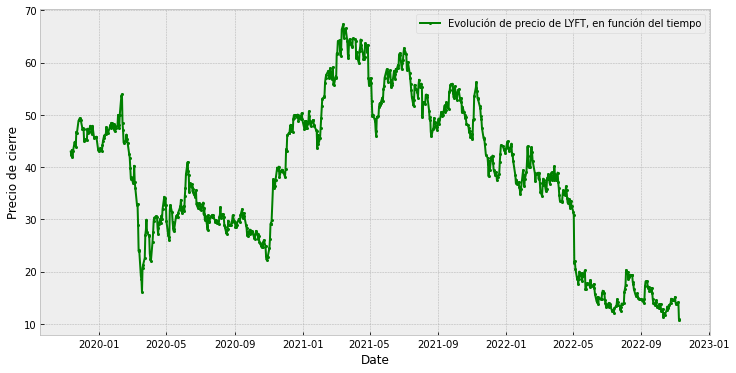

In [12]:
# Visualizemos los datos
plt.style.use(style='bmh')
plt.figure(figsize=(12,6))
plt.plot(df['close'], color='green', marker='.', linestyle='-',
     linewidth=2, markersize=4)
plt.xlabel('Date')
plt.ylabel('Precio de cierre')
plt.legend([f'Evolución de precio de {STOCK}, en función del tiempo'], loc='best')
plt.show()

Vemos datos con gran variación en escala y sabemos que las redes funcionan mejor con datos escalados. En este caso aplicaremos MinMax al precio de cierre

## I. Separación en conjunto de entrenamiento y prueba


In [13]:
# Split into train and test sets
test_size = int(len(df) * TEST_SIZE) #calculo el porcentaje para la longitud
train_size = len(df) - test_size # resto es el train size

df_train = df.iloc[:train_size, :]
df_test = df.iloc[train_size:,:]

dataset_train, dataset_test = df_train.values, df_test.values

print(f'dataset_train length:{len(dataset_train)}, dataset_test length:{len(dataset_test)}')

dataset_train length:530, dataset_test length:226


Se comprueba el tamaño del DataSet de Train = 530, y Test = 226

In [14]:
dataset_train

array([[42.97 ],
       [42.33 ],
       [43.3  ],
       [41.92 ],
       [43.04 ],
       [44.86 ],
       [44.15 ],
       [43.95 ],
       [46.76 ],
       [46.46 ],
       [48.94 ],
       [49.   ],
       [49.37 ],
       [48.98 ],
       [47.39 ],
       [47.51 ],
       [47.315],
       [45.065],
       [45.2  ],
       [45.42 ],
       [45.26 ],
       [47.36 ],
       [46.6  ],
       [46.75 ],
       [47.93 ],
       [47.5  ],
       [47.01 ],
       [46.28 ],
       [47.92 ],
       [45.54 ],
       [45.7  ],
       [45.73 ],
       [45.84 ],
       [43.5  ],
       [43.02 ],
       [43.58 ],
       [43.19 ],
       [43.1  ],
       [44.25 ],
       [45.08 ],
       [45.59 ],
       [46.06 ],
       [46.35 ],
       [47.68 ],
       [47.08 ],
       [46.83 ],
       [46.52 ],
       [47.98 ],
       [47.47 ],
       [48.48 ],
       [48.43 ],
       [47.36 ],
       [48.21 ],
       [46.84 ],
       [47.79 ],
       [47.48 ],
       [47.96 ],
       [50.   ],
       [48.06 

In [15]:
# Split into train and test sets
dataset = df.values

test_size = int(len(dataset) * TEST_SIZE)
train_size = len(dataset) - test_size

dataset_train, dataset_test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(f'dataset_train length:{len(dataset_train)}, dataset_test length:{len(dataset_test)}')

dataset_train length:530, dataset_test length:226


## II. Escalamiento de Datos

In [16]:
# Normalización de datos, en este caso, rescalamos con un minmaxscaler
# con esto, quedan entre [0,1]
scaler = MinMaxScaler()
ds_scale_train = scaler.fit_transform(dataset_train)
ds_scale_test = scaler.transform(dataset_test)


In [17]:
ds_scale_train.shape

(530, 1)

In [18]:
ds_scale_test.shape

(226, 1)

## III. Crear características (X) y target (Y)
Dado que queremos predecir el precio de la acción en un determinado día usando como *features* los **N_STEPS** días previos, se perderán esos primeros días del conjunto de entrenamiento.

In [19]:
## con Drop last day dejamos el último día afuera objeto hacer la predicción final
##

def create_features_and_target(dataset, look_back = N_STEPS): #loop back 15, deja 15 registros
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back -1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  
  return np.array(dataX), np.array(dataY)

In [20]:
trainX, trainY = create_features_and_target(ds_scale_train)
testX, testY = create_features_and_target(ds_scale_test)


# Para verificar consistencia
print(f'X train shape: {trainX.shape}, Y train shape: {trainY.shape}')
print(f'X test shape: {testX.shape}, Y test shape: {testY.shape}')



X train shape: (514, 15), Y train shape: (514,)
X test shape: (210, 15), Y test shape: (210,)


## IV. Preparación de los datos.

Nuestro objetivo es poder predecir el precio de la acción para los próximos tres días. Esto significa que debemos preparar nuestros datos para tal efecto, haciendo un corrimiento en la serie de tiempo, objeto podamos con los datos del día de hoy, predecir el precio futuro.

In [21]:
# Se define una función de CallBack que se utilizará en alguna de las propuestas

class EarlyStoppingCustom(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    
    if(logs.get('mae') < 0.02): #se establece un threshold de 0.02 para el MAE (aim)
      print("\nMAEthreshold reached. Training stopped.")
      self.model.stop_training = True

# Let's create an object of our class and assign it to a variable
early_stoppingcustom = EarlyStoppingCustom()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=8,
                                                    mode='min')

De igual manera, se define una función que permita graficar el _performance_ del modelo, en base a los parámetros de `Val_loss` y `Val_Mae` (Accuracy), en función de la `Epoch` (history).

In [22]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

## V. Definición de Red LSTM:

Se definen 3 redes LSTM, con variaciones de hiperparámetros, considerando lo enunciado en el artículo [_10 Hyperparameters to keep an eye on for your LSTM model — and other tips_](https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4), de Medium.

### A. Propuesta de Arquitectura de Red LSTM Nº 1 (1st Proposal):

En este propuesta, se definen los siguientes hiperparámetros:

- Epoch = 50.
- Validation Split = 7%.
- 1ra Capa LSTM = 128 + DropOut = 0.2
- 2da Capa LSTM = 64
- 3ra Capa Densa = 32
- 4ta Capa Densa (Output) = 1
- Activation Function = Linear
- Optimizador = ADAM
- Uso Callback = No.

In [23]:
from keras.layers.core.activation import Activation
def getCompileModel():
  model = Sequential(name= 'LSTM_1st_Proposal')
  
  # El número de dimensiones será el número de largo de nuestra secuencia de 
  # entrada (días) x el número de dimensionalidad de la data (1 en este caso)

  model.add(LSTM(128, return_sequences=True, input_shape=(N_STEPS, 1), name = 'LSTM_L1'))
  model.add(Dropout(0.2))
  model.add(LSTM(64, name='LSTM_L2'))
  model.add(Dense(32, name= 'Dense_L3'))
  model.add(Dense(1, name = 'Dense_L4'))
  model.add(Activation('linear'))
  

  model.compile(loss='mean_squared_error', optimizer='adam', metrics='mae')
  model.summary()
 
  return model


In [24]:
model = getCompileModel()

Model: "LSTM_1st_Proposal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_L1 (LSTM)              (None, 15, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 15, 128)           0         
                                                                 
 LSTM_L2 (LSTM)              (None, 64)                49408     
                                                                 
 Dense_L3 (Dense)            (None, 32)                2080      
                                                                 
 Dense_L4 (Dense)            (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 118,081
Trainable params: 118,081
N

In [25]:
history = model.fit(trainX,trainY,
            batch_size = BATCH_SIZE,
            epochs = 50,
            validation_split=0.07)

Epoch 1/50
30/30 [==============================] - 6s 76ms/step - loss: 0.0412 - mae: 0.1435 - val_loss: 0.0075 - val_mae: 0.0756
Epoch 2/50
30/30 [==============================] - 1s 40ms/step - loss: 0.0069 - mae: 0.0658 - val_loss: 0.0074 - val_mae: 0.0736
Epoch 3/50
30/30 [==============================] - 1s 29ms/step - loss: 0.0053 - mae: 0.0547 - val_loss: 0.0063 - val_mae: 0.0643
Epoch 4/50
30/30 [==============================] - 1s 26ms/step - loss: 0.0051 - mae: 0.0524 - val_loss: 0.0072 - val_mae: 0.0726
Epoch 5/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0046 - mae: 0.0512 - val_loss: 0.0056 - val_mae: 0.0588
Epoch 6/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0051 - mae: 0.0541 - val_loss: 0.0128 - val_mae: 0.1018
Epoch 7/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0045 - mae: 0.0509 - val_loss: 0.0057 - val_mae: 0.0526
Epoch 8/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0040 - m

In [26]:
# save model
model.save('./drive/MyDrive/LSTM_LYFT_1.h5')

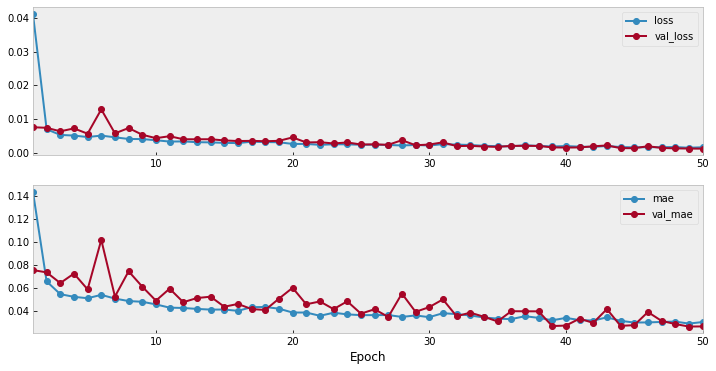

In [27]:
plot_history(history, width=12, height=6)

Como se observa en la figura, se produce una convergencia en la `Epoch` 11, por lo cual es conveniente reducirlos. Por otra parte se observa que tiene un aumento inicial, por lo cual, para el modelo 2 se aumentará el número de neuronas y de igual manera, se incorporará una capa adicional LSTM.
Con respecto al análisis de las métricas, no se puede determinar una mejora significativa en reducir los errores `MSE` y `MAE`.

#### A.1. Rendimiento del modelo en conjunto de prueba

In [28]:
def compute_metrics(true_series, forecast):
  mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
  mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
  mape = tf.keras.metrics.mean_absolute_percentage_error(true_series, forecast).numpy()

  return mse, mae, mape

In [29]:
forecast = model.predict(testX)
mse, mae, mape = compute_metrics(testY, forecast.squeeze())

print(f'Model: Mean Square Error: {mse}, Mean Absolute Error: {mae}, Mean Absolute Percentage Error: {mape}')

7/7 [==============================] - 1s 13ms/step
Model: Mean Square Error: 0.0010208811145275831, Mean Absolute Error: 0.02430420182645321, Mean Absolute Percentage Error: 66.51255798339844


De las métricas obtenidas, el MSE que corresponde al _error cuadrado promedio de nuestras predicciones_ lo que conlleva que cuanto mayor sea este valor, peor es el modelo, en este caso es bajo pero no es útil para análisis, sólo sería en caso que se obtengan valores anormales, en este caso, se amplificaría el error.

El MAE (Mean Absolute Error), se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones, por lo cual, es más robusto (menos sensible a los valores atípicos), que normalmente se esperarían en aspectos financieros

#### A.2. Predicción precio mañana

In [30]:
next_day_features = ds_scale_test[-N_STEPS:,0]
next_day_features

array([-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
       -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
       -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436],
      dtype=float32)

In [31]:
#dar forma del modelo para predecir
next_day_features = np.expand_dims(np.array(ds_scale_test[-N_STEPS:,0]), axis=0)
next_day_features

array([[-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
        -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
        -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436]],
      dtype=float32)

In [32]:
pred = model.predict(next_day_features)

forecast_price = scaler.inverse_transform(pred)[0][0]

print(f'El precio de {STOCK} para el día de de mañana es {forecast_price} USD')

1/1 [==============================] - 0s 24ms/step
El precio de LYFT para el día de de mañana es 12.417381286621094 USD


In [33]:
# Determinar los index, objeto conocer la dimensionalidad.
# se debe recordar que se usa este conjunto de datos para la comparación
# Largo registro = 226 
df_test.index

DatetimeIndex(['2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31',
               ...
               '2022-10-27', '2022-10-28', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-07',
               '2022-11-08', '2022-11-09'],
              dtype='datetime64[ns]', length=226, freq=None)

Con lo anterior, se puede determinar que el primer registro del conjunto de validación es a contar del _17-DIC-21_ hasta el _09-NOV-22_. Esto se mantendrà para todos los modelos propuestos.

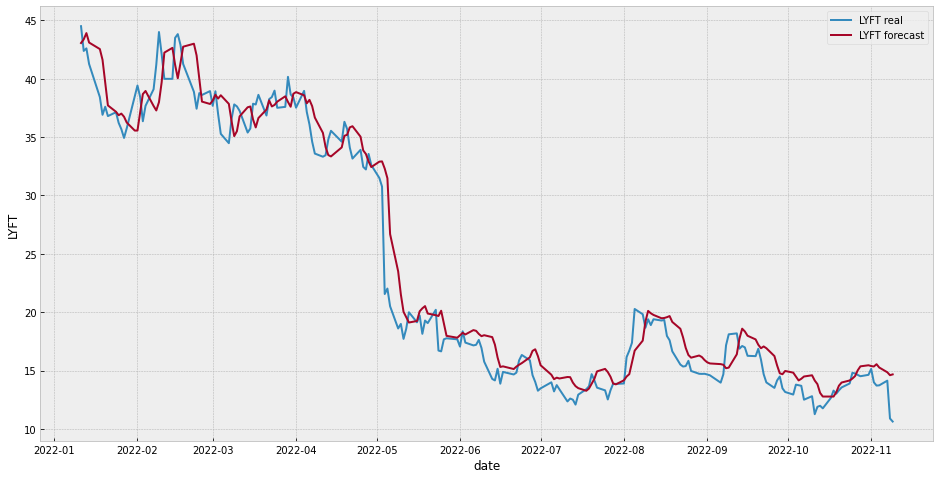

In [34]:
forecast_prices = scaler.inverse_transform(forecast).squeeze()
plt.figure(figsize=(16,8))
dates = df_test.index[N_STEPS+1:,]

plt.plot(dates,dataset_test[N_STEPS+1:,], label='LYFT real')
plt.plot(dates,scaler.inverse_transform(forecast), label='LYFT forecast')
plt.xlabel('date')
plt.ylabel(f'{STOCK}')
plt.legend()


El análisis gráfico muestra que el ajuste del modelo es bastante exacto, lo que se puede apreciar por los bajos valores obtenidos de `MSE`, `MAE` y `MAPE`.

### B. Propuesta de Arquitectura de Red LSTM Nº 2 (2nd Proposal):

En este propuesta, se definen los siguientes hiperparámetros:

- Epoch = 50.
- Validation Split = 7%.
- 1ra Capa LSTM = 256 + DropOut = 0.3
- 2da Capa LSTM = 128 + DropOut = 0.3
- 3da Capa LSTM = 64 + DropOut = 0.3
- 4ta Capa LSTM = 32 
- 5ta Capa Densa = 20
- 6ta Capa Densa (Output) = 1
- Activation Function = Linear
- Optimizador = ADAM
- Callback = Si, EarlyStopping.



In [35]:
from keras.layers.core.activation import Activation
def getCompileModel():
  model = Sequential(name= 'LSTM_2nd_Proposal')
  
  # El número de dimensiones será el número de largo de nuestra secuencia de 
  # entrada (días) x el número de dimensionalidad de la data (1 en este caso)

  model.add(LSTM(256, return_sequences=True, input_shape=(N_STEPS, 1), name = 'LSTM_L1'))
  model.add(Dropout(0.3))
  model.add(LSTM(128, return_sequences=True, name='LSTM_L2'))
  model.add(Dropout(0.3))
  model.add(LSTM(64, return_sequences=True, name='LSTM_L3'))
  model.add(Dropout(0.3))
  model.add(LSTM(32, name = 'LSTM_L4'))
  model.add(Dense(20, name= 'Dense_L5'))
  model.add(Dense(1, name = 'Dense_L6'))
  model.add(Activation('linear'))
  

  model.compile(loss='mean_squared_error', optimizer='adam', metrics='mae')
  model.summary()
 
  return model


In [36]:
model = getCompileModel()

Model: "LSTM_2nd_Proposal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_L1 (LSTM)              (None, 15, 256)           264192    
                                                                 
 dropout_1 (Dropout)         (None, 15, 256)           0         
                                                                 
 LSTM_L2 (LSTM)              (None, 15, 128)           197120    
                                                                 
 dropout_2 (Dropout)         (None, 15, 128)           0         
                                                                 
 LSTM_L3 (LSTM)              (None, 15, 64)            49408     
                                                                 
 dropout_3 (Dropout)         (None, 15, 64)            0         
                                                                 
 LSTM_L4 (LSTM)              (None, 32)          

In [37]:
history = model.fit(trainX,trainY,
            batch_size = BATCH_SIZE,
            epochs = 50,
            shuffle = False,
            validation_split=0.07,
            callbacks=[early_stopping]) #en este red si se considero el uso del callback definido

Epoch 1/50
30/30 [==============================] - 12s 145ms/step - loss: 0.0518 - mae: 0.1726 - val_loss: 0.0142 - val_mae: 0.0903
Epoch 2/50
30/30 [==============================] - 3s 85ms/step - loss: 0.0444 - mae: 0.1666 - val_loss: 0.0268 - val_mae: 0.1431
Epoch 3/50
30/30 [==============================] - 3s 85ms/step - loss: 0.0464 - mae: 0.1619 - val_loss: 0.0263 - val_mae: 0.1407
Epoch 4/50
30/30 [==============================] - 3s 85ms/step - loss: 0.0527 - mae: 0.1715 - val_loss: 0.0338 - val_mae: 0.1606
Epoch 5/50
30/30 [==============================] - 3s 88ms/step - loss: 0.0394 - mae: 0.1487 - val_loss: 0.0133 - val_mae: 0.1010
Epoch 6/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0353 - mae: 0.1549 - val_loss: 0.0678 - val_mae: 0.2386
Epoch 7/50
30/30 [==============================] - 4s 126ms/step - loss: 0.0630 - mae: 0.1959 - val_loss: 0.0097 - val_mae: 0.0827
Epoch 8/50
30/30 [==============================] - 3s 89ms/step - loss: 0.0396 

In [38]:
# save model
model.save('./drive/MyDrive/LSTM_LYFT_2.h5')

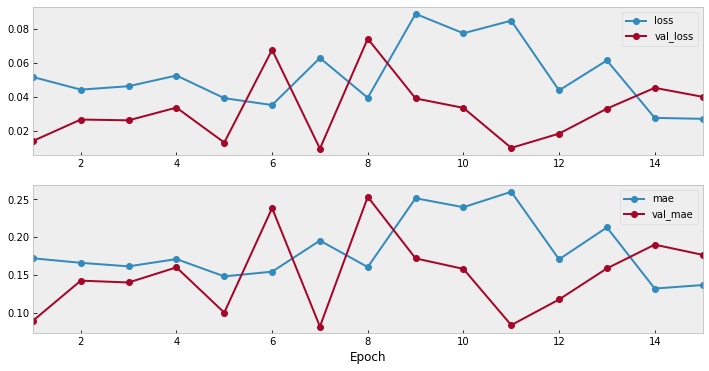

In [39]:
plot_history(history, width=12, height=6)

#### B.1. Rendimiento del modelo en conjunto de prueba

In [40]:
forecast = model.predict(testX)
mse, mae, mape = compute_metrics(testY, forecast.squeeze())

print(f'Model Mean Square Error: {mse}, Mean Absolute Error: {mae}, Mean Absolute Percentage Error: {mape}')

7/7 [==============================] - 2s 34ms/step
Model Mean Square Error: 0.010386000387370586, Mean Absolute Error: 0.07368546724319458, Mean Absolute Percentage Error: 87.87092590332031


#### B.2. Predicción precio mañana

In [41]:
next_day_features = ds_scale_test[-N_STEPS:,0]
next_day_features

array([-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
       -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
       -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436],
      dtype=float32)

In [42]:
#dar forma del modelo para predecir
next_day_features = np.expand_dims(np.array(ds_scale_test[-N_STEPS:,0]), axis=0)
next_day_features

array([[-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
        -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
        -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436]],
      dtype=float32)

In [43]:
pred = model.predict(next_day_features)

forecast_price = scaler.inverse_transform(pred)[0][0]

print(f'El precio de {STOCK} para el día de de mañana es {forecast_price} USD')

1/1 [==============================] - 0s 27ms/step
El precio de LYFT para el día de de mañana es 15.358186721801758 USD


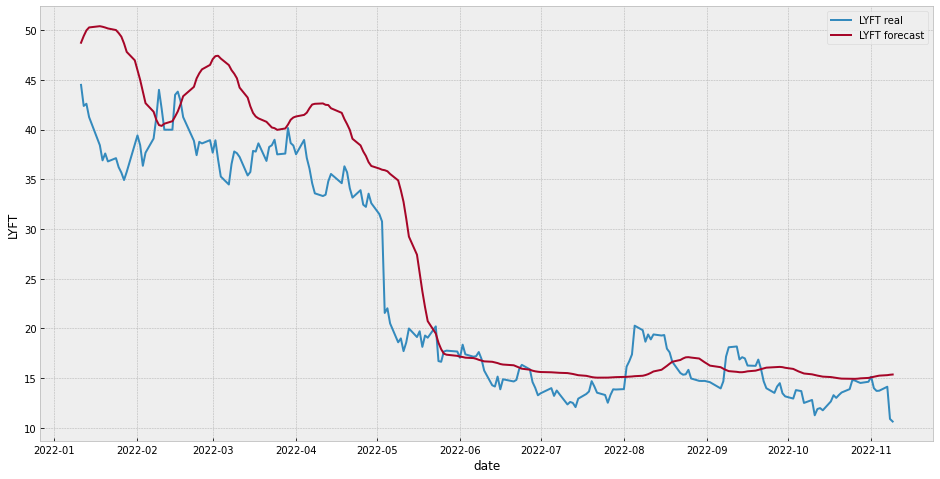

In [44]:
forecast_prices = scaler.inverse_transform(forecast).squeeze()
plt.figure(figsize=(16,8))
dates = df_test.index[N_STEPS+1:,]

plt.plot(dates,dataset_test[N_STEPS+1:,], label='LYFT real')
plt.plot(dates,scaler.inverse_transform(forecast), label='LYFT forecast')
plt.xlabel('date')
plt.ylabel(f'{STOCK}')
plt.legend()


El análisis del gráfico muestra que este modelo a pesar de adicionar una red LSTM Adicional e incrementar su número profundidad, el uso del callback (earlystopping) produce una detención del entrenamiento una vez que se ha alcanzado el min (objetivo), determinado. Por lo cual, el modelo no alcanza a optimizarse completamente.

### C. Propuesta de Arquitectura de Red LSTM Nº 3 (3rd Proposal):

En este propuesta, se definen los siguientes hiperparámetros:

- Epoch = 50.
- 1ra Capa LSTM = 256 + DropOut = 0.3
- 2da Capa LSTM = 128 + DropOut = 0.3
- 3da Capa LSTM = 64 + DropOut = 0.3
- 4ta Capa LSTM = 32 + DropOut = 0.3
- 5ta Capa Densa = 20
- 6ta Capa Densa (Output) = 1
- Activation Function = Linear
- Optimizador = SGD
- Callback = No.



In [45]:
from keras.layers.core.activation import Activation
def getCompileModel():
  model = Sequential(name= 'LSTM_3rd_Proposal')
  
  # El número de dimensiones será el número de largo de nuestra secuencia de 
  # entrada (días) x el número de dimensionalidad de la data (1 en este caso)

  model.add(LSTM(256, return_sequences=True, input_shape=(N_STEPS, 1), name = 'LSTM_L1'))
  model.add(Dropout(0.3))
  model.add(LSTM(128, return_sequences=True, name='LSTM_L2'))
  model.add(Dropout(0.3))
  model.add(LSTM(64, return_sequences=True, name='LSTM_L3'))
  model.add(Dropout(0.3))
  model.add(LSTM(32, name = 'LSTM_L4'))
  model.add(Dense(20, name= 'Dense_L5'))
  model.add(Dense(1, name = 'Dense_L6'))
  model.add(Activation('linear'))
  

  model.compile(loss='mean_squared_error', optimizer='SGD', metrics='mae')
  model.summary()
 
  return model


In [46]:
model = getCompileModel()

Model: "LSTM_3rd_Proposal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_L1 (LSTM)              (None, 15, 256)           264192    
                                                                 
 dropout_4 (Dropout)         (None, 15, 256)           0         
                                                                 
 LSTM_L2 (LSTM)              (None, 15, 128)           197120    
                                                                 
 dropout_5 (Dropout)         (None, 15, 128)           0         
                                                                 
 LSTM_L3 (LSTM)              (None, 15, 64)            49408     
                                                                 
 dropout_6 (Dropout)         (None, 15, 64)            0         
                                                                 
 LSTM_L4 (LSTM)              (None, 32)          

In [47]:
history = model.fit(trainX,trainY,
            batch_size = BATCH_SIZE,
            epochs = 50,
            validation_split=0.07)
            #callbacks=[early_stopping]) # en este red, no se considerará el uso del callback definido

Epoch 1/50
30/30 [==============================] - 20s 143ms/step - loss: 0.0782 - mae: 0.2333 - val_loss: 0.0137 - val_mae: 0.0946
Epoch 2/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0488 - mae: 0.1928 - val_loss: 0.0125 - val_mae: 0.0912
Epoch 3/50
30/30 [==============================] - 3s 87ms/step - loss: 0.0449 - mae: 0.1844 - val_loss: 0.0104 - val_mae: 0.0844
Epoch 4/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0414 - mae: 0.1747 - val_loss: 0.0104 - val_mae: 0.0837
Epoch 5/50
30/30 [==============================] - 3s 88ms/step - loss: 0.0371 - mae: 0.1658 - val_loss: 0.0100 - val_mae: 0.0844
Epoch 6/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0329 - mae: 0.1545 - val_loss: 0.0102 - val_mae: 0.0818
Epoch 7/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0298 - mae: 0.1468 - val_loss: 0.0103 - val_mae: 0.0811
Epoch 8/50
30/30 [==============================] - 3s 87ms/step - loss: 0.0257 -

In [48]:
# save model
model.save('./drive/MyDrive/LSTM_LYFT_3.h5')

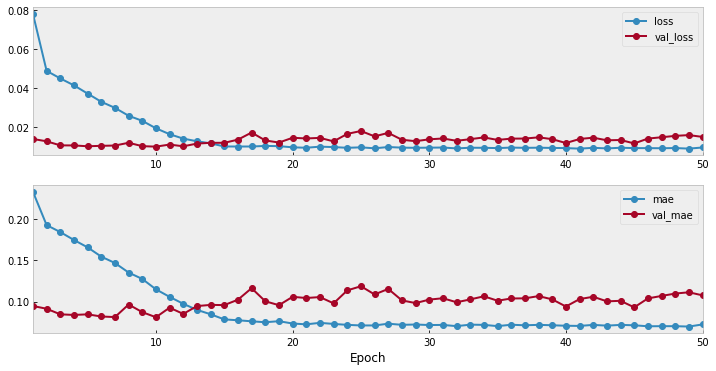

In [49]:
plot_history(history, width=12, height=6)

#### C.1. Rendimiento del modelo en conjunto de prueba

In [50]:
forecast = model.predict(testX)
mse, mae, mape = compute_metrics(testY, forecast.squeeze())

print(f'Model Mean Square Error: {mse}, Mean Absolute Error: {mae}, Mean Absolute Percentage Error: {mape}')

7/7 [==============================] - 2s 34ms/step
Model Mean Square Error: 0.008467878215014935, Mean Absolute Error: 0.07347666472196579, Mean Absolute Percentage Error: 187.39849853515625


#### C.2. Predicción precio mañana

In [51]:
next_day_features = ds_scale_test[-N_STEPS:,0]
next_day_features

array([-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
       -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
       -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436],
      dtype=float32)

In [52]:
#dar forma del modelo para predecir
next_day_features = np.expand_dims(np.array(ds_scale_test[-N_STEPS:,0]), axis=0)
next_day_features

array([[-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
        -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
        -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436]],
      dtype=float32)

In [53]:
pred = model.predict(next_day_features)

forecast_price = scaler.inverse_transform(pred)[0][0]

print(f'El precio de {STOCK} para el día de de mañana es {forecast_price} USD')

1/1 [==============================] - 0s 25ms/step
El precio de LYFT para el día de de mañana es 16.719940185546875 USD


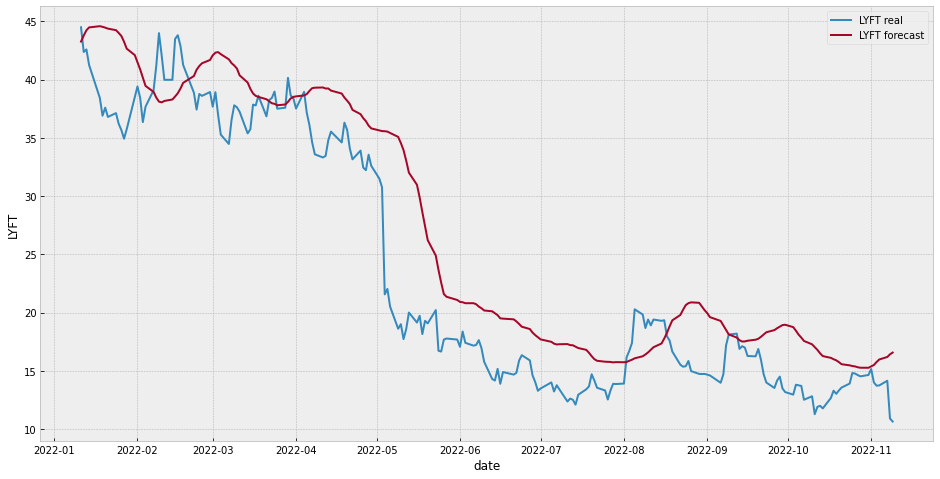

In [54]:
forecast_prices = scaler.inverse_transform(forecast).squeeze()
plt.figure(figsize=(16,8))
dates = df_test.index[N_STEPS+1:,]

plt.plot(dates,dataset_test[N_STEPS+1:,], label='LYFT real')
plt.plot(dates,scaler.inverse_transform(forecast), label='LYFT forecast')
plt.xlabel('date')
plt.ylabel(f'{STOCK}')
plt.legend()


En este tercer modelo, se decidió mantener la distribución (arquitectura) de red anterior pero con el objeto de entrenar con mayor número de épocas, se decidió no utilizar un CallBack y cambiar el optimizador por un Stochastic Gradient Descent. El cual muestra la poca eficiencia que genera en el ajuste del modelo.

### D. Propuesta de Arquitectura de Red LSTM Nº 4 (4rd Proposal):

En este propuesta, se definen los siguientes hiperparámetros:

- Epoch = 100.
- 1ra Capa LSTM = 256 + DropOut = 0.3
- 2da Capa LSTM = 128 + DropOut = 0.3
- 3da Capa LSTM = 64 + DropOut = 0.3
- 4ta Capa LSTM = 32 + DropOut = 0.3
- 5ta Capa Densa = 20
- 6ta Capa Densa (Output) = 1
- Activation Function = Linear
- Optimizador = ADAM
- Callback = No.



In [55]:
from keras.layers.core.activation import Activation
def getCompileModel():
  model = Sequential(name= 'LSTM_4rd_Proposal')
  
  # El número de dimensiones será el número de largo de nuestra secuencia de 
  # entrada (días) x el número de dimensionalidad de la data (1 en este caso)

  model.add(LSTM(256, return_sequences=True, input_shape=(N_STEPS, 1), name = 'LSTM_L1'))
  model.add(Dropout(0.3))
  model.add(LSTM(128, return_sequences=True, name='LSTM_L2'))
  model.add(Dropout(0.3))
  model.add(LSTM(64, return_sequences=True, name='LSTM_L3'))
  model.add(Dropout(0.3))
  model.add(LSTM(32, name = 'LSTM_L4'))
  model.add(Dense(20, name= 'Dense_L5'))
  model.add(Dense(1, name = 'Dense_L6'))
  model.add(Activation('linear'))
  

  model.compile(loss='mean_squared_error', optimizer='adam', metrics='mae')
  model.summary()
 
  return model


In [56]:
model = getCompileModel()

Model: "LSTM_4rd_Proposal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_L1 (LSTM)              (None, 15, 256)           264192    
                                                                 
 dropout_7 (Dropout)         (None, 15, 256)           0         
                                                                 
 LSTM_L2 (LSTM)              (None, 15, 128)           197120    
                                                                 
 dropout_8 (Dropout)         (None, 15, 128)           0         
                                                                 
 LSTM_L3 (LSTM)              (None, 15, 64)            49408     
                                                                 
 dropout_9 (Dropout)         (None, 15, 64)            0         
                                                                 
 LSTM_L4 (LSTM)              (None, 32)          

In [58]:
history = model.fit(trainX,trainY,
            batch_size = BATCH_SIZE,
            epochs = 100,
            validation_split=0.07)
            #callbacks=[early_stopping]) # en este red, no se considerará el uso del callback definido

Epoch 1/100
30/30 [==============================] - 3s 89ms/step - loss: 0.0104 - mae: 0.0777 - val_loss: 0.0182 - val_mae: 0.1193
Epoch 2/100
30/30 [==============================] - 3s 89ms/step - loss: 0.0094 - mae: 0.0741 - val_loss: 0.0096 - val_mae: 0.0801
Epoch 3/100
30/30 [==============================] - 3s 89ms/step - loss: 0.0090 - mae: 0.0699 - val_loss: 0.0107 - val_mae: 0.0897
Epoch 4/100
30/30 [==============================] - 3s 90ms/step - loss: 0.0088 - mae: 0.0700 - val_loss: 0.0096 - val_mae: 0.0692
Epoch 5/100
30/30 [==============================] - 3s 87ms/step - loss: 0.0081 - mae: 0.0679 - val_loss: 0.0094 - val_mae: 0.0824
Epoch 6/100
30/30 [==============================] - 3s 107ms/step - loss: 0.0082 - mae: 0.0690 - val_loss: 0.0086 - val_mae: 0.0777
Epoch 7/100
30/30 [==============================] - 3s 86ms/step - loss: 0.0075 - mae: 0.0648 - val_loss: 0.0080 - val_mae: 0.0652
Epoch 8/100
30/30 [==============================] - 3s 88ms/step - loss: 0

In [59]:
# save model
model.save('./drive/MyDrive/LSTM_LYFT_4.h5')

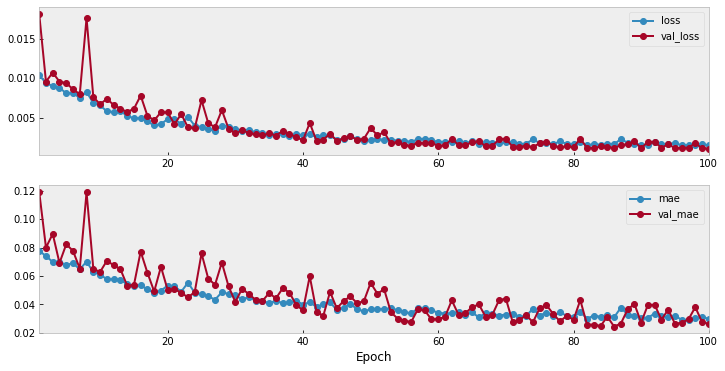

In [60]:
plot_history(history, width=12, height=6)

#### D.1. Rendimiento del modelo en conjunto de prueba

In [61]:
forecast = model.predict(testX)
mse, mae, mape = compute_metrics(testY, forecast.squeeze())

print(f'Model Mean Square Error: {mse}, Mean Absolute Error: {mae}, Mean Absolute Percentage Error: {mape}')

7/7 [==============================] - 3s 62ms/step
Model Mean Square Error: 0.0027990906964987516, Mean Absolute Error: 0.045559801161289215, Mean Absolute Percentage Error: 165.9218292236328


#### D.2. Predicción precio mañana

In [62]:
next_day_features = ds_scale_test[-N_STEPS:,0]
next_day_features

array([-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
       -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
       -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436],
      dtype=float32)

In [63]:
#dar forma del modelo para predecir
next_day_features = np.expand_dims(np.array(ds_scale_test[-N_STEPS:,0]), axis=0)
next_day_features

array([[-0.0533385 , -0.04847184, -0.04185322, -0.02413857, -0.02511191,
        -0.02764258, -0.0297839 , -0.02744791, -0.01751995, -0.03990653,
        -0.0453572 , -0.04496786, -0.0371812 , -0.10025306, -0.10531436]],
      dtype=float32)

In [64]:
pred = model.predict(next_day_features)

forecast_price = scaler.inverse_transform(pred)[0][0]

print(f'El precio de {STOCK} para el día de de mañana es {forecast_price} USD')

1/1 [==============================] - 0s 33ms/step
El precio de LYFT para el día de de mañana es 13.810098648071289 USD


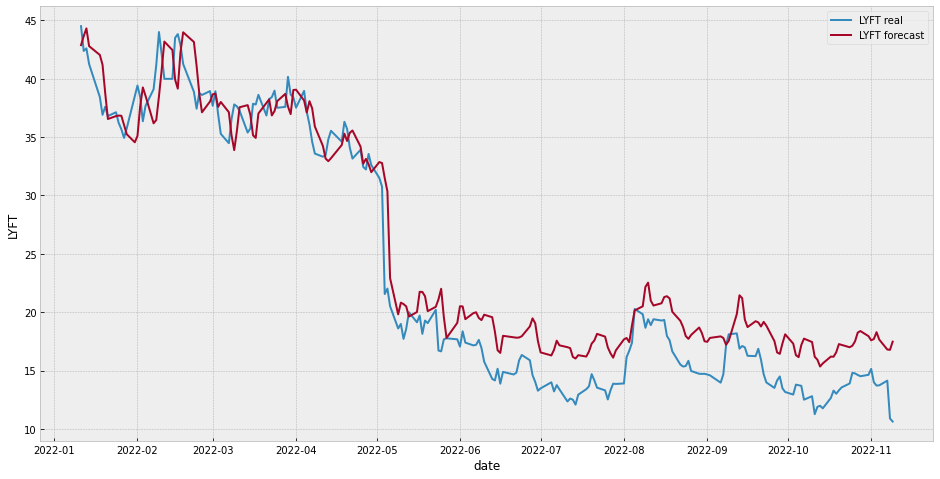

In [65]:
forecast_prices = scaler.inverse_transform(forecast).squeeze()
plt.figure(figsize=(16,8))
dates = df_test.index[N_STEPS+1:,]

plt.plot(dates,dataset_test[N_STEPS+1:,], label='LYFT real')
plt.plot(dates,scaler.inverse_transform(forecast), label='LYFT forecast')
plt.xlabel('date')
plt.ylabel(f'{STOCK}')
plt.legend()


En este ultimo caso, se deicidió de igual manera utilizar la misma arquitectura pero con el optimizador Adam, existiendo una mejoría signicativa en el modelo pero con leves diferencias hacia el final, por lo cual, es posible determinar que no necesariamente es óptimo ingresar mayor número de capas al modelo.

## Tabla Resumen de Métricas Obtenidas en los modelos:

| Nº de modelo | Descripción  | Mean Square Error| Mean Absolute Error  | Mean Absolute Percentage Error | Precio (Predicted)|
|:---:|:-----------------------:|:-------:|:----------:|:----------:|:----------:|
| 1 | `1st Proposal` | 0.00102  |0.02430|66.51255|12.41738 USD|
| 2 | `2nd Proposal` | 0.01039 |0.07369|87.87093|15.35819 USD|
| 3 | `3rd Proposal` | 0.00847  |0.07348|187.39850|16.71994 USD|
| 3 | `4rd Proposal` |0.00280 |0.04556|165.92183|13.81020 USD|



## VI. Conclusiones:

Como se observa, la tabla resumen de métricas obtenidos en los modelos muestra el `MSE`, `MAE`y `MAPE`; al igual que el análisis gráfico (ajuste), efectuado en cada modelo. El primer modelo posee las mejores métricas, si analizamos el tamaño del error (absoluto) en términos porcentuales **MAPE**, podemos observar que el menor porcentaje se presenta en la primera propuesta (1st proposal).

Por lo anterior, se puede señalar que _precio de cierre (**Close**) de la acción para el siguiente día usando como base el precio de los 15 días anteriores es de 12.41738 USD_.

Esto, se puede comparar con el precio de cierre obtenido desde Yahoo Finance para el día 11-NOV-22:

In [69]:
date_set_1 = dt.date(2022, 11, 12)

date_1_day = (dt.date(2022, 11, 12) - dt.timedelta(days=1)).strftime('%Y-%m-%d')
df2 = yf.get_data(STOCK, start_date = date_1_day,
                 end_date=date_set_1,
                 interval = INTERVAL)
print(df2)

             open   high    low  close  adjclose    volume ticker
2022-11-11  11.19  12.79  11.14   12.7      12.7  26089500   LYFT


Como se observa, el precio de cierre para el día 11 de nov es equivalente a 12.7 USD y nuestro modelo fue capaz de predecir 12.41 USD.